In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import inspect
from collections import Counter
import networkx as nx

In [3]:
#Data is loaded in to jupyter
Data = pd.read_csv('AIMS-GHANA-NET2425.csv', delimiter="\t")
Data

,First_Name,Country,Background,Friend1,Friend2,Friend3
0,Bella,Burundi,Statistics,DicksonJ,Cubaka,Carine
1,Bright,Ghana,Mathematics Education,Richard,DicksonA,Isaac
2,DicksonA,Ghana,Mathematics,Bright,Richard,Isaac
3,Richard,Ghana,Statistics,Bright,DicksonA,Isaac
4,SamuelA,Ghana,Physics,Ernestina,Zanitar,Nondi
5,Leticia,Uganda,Mathematics,Deniz,Carine,Augustina
6,Steve,Kenya,Mathematics,Godfrey,Edwin,Prosper
7,Boldwin,Zambia,Mathematics,Sarah,Cubaka,Edwin
8,Sarah,Madagascar,Statistics,Boldwin,Cubaka,Jean-Pierre
9,Moshood,Nigeria,Mathematics,Priscilla,Augustina,SamuelA


## Data Cleaning

In [4]:
#This line takes away white spaces
Data = Data.applymap(lambda x: x.strip() if isinstance(x, str) else x)
Data.head()

,First_Name,Country,Background,Friend1,Friend2,Friend3
0,Bella,Burundi,Statistics,DicksonJ,Cubaka,Carine
1,Bright,Ghana,Mathematics Education,Richard,DicksonA,Isaac
2,DicksonA,Ghana,Mathematics,Bright,Richard,Isaac
3,Richard,Ghana,Statistics,Bright,DicksonA,Isaac
4,SamuelA,Ghana,Physics,Ernestina,Zanitar,Nondi


In [5]:
print(Data.duplicated().sum())

0


## Constructing graph

In [6]:
# Create an empty graph
G = nx.Graph()

# Add nodes and edges
for _, row in Data.iterrows():
    person = row["First_Name"]
    friends = [row["Friend1"], row["Friend2"], row["Friend3"]]
    
    G.add_node(person)
    for friend in friends:
        if pd.notna(friend):  # Ensure the friend is not NaN
            G.add_node(friend)
            G.add_edge(person, friend)

In [7]:
print(f'The number of nodes the graph has is:{ G.number_of_nodes()}{" "} \nThe number of nodes the graph has is:{ G.number_of_edges()}')

The number of nodes the graph has is:56  
The number of nodes the graph has is:120


## Question 1

In [8]:
print(nx.is_connected(G))
#The graph is connected 

True


## Question 2 (Centrality analysis)

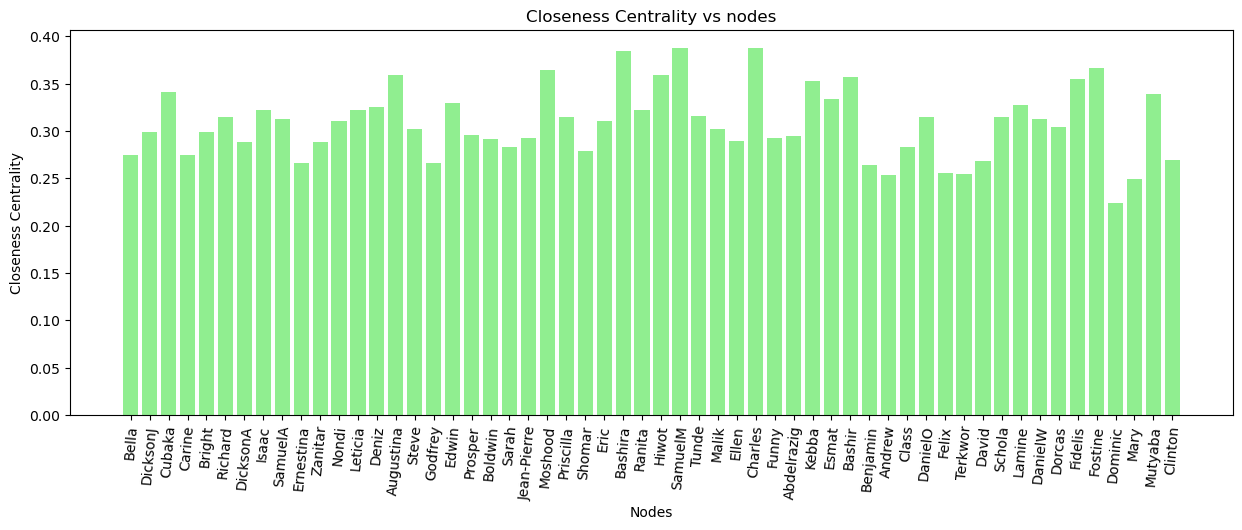

Node with highest closeness centrality: SamuelM (0.3873239436619718)


In [9]:
Close = nx.closeness_centrality(G)
plt.figure(figsize=(15, 5))
plt.bar(Close.keys(), Close.values(), color="lightgreen")
plt.title('Closeness Centrality vs nodes')
plt.xlabel("Nodes")
plt.ylabel("Closeness Centrality")
plt.xticks(rotation=85) 
plt.show()


Close = nx.closeness_centrality(G)
max_node2 = max(Close, key=Close.get)
max_values2 = Close[max_node2]
print(f"Node with highest closeness centrality: {max_node2} ({max_values2})")


Node with highest degree centrality: Cubaka (0.1273)


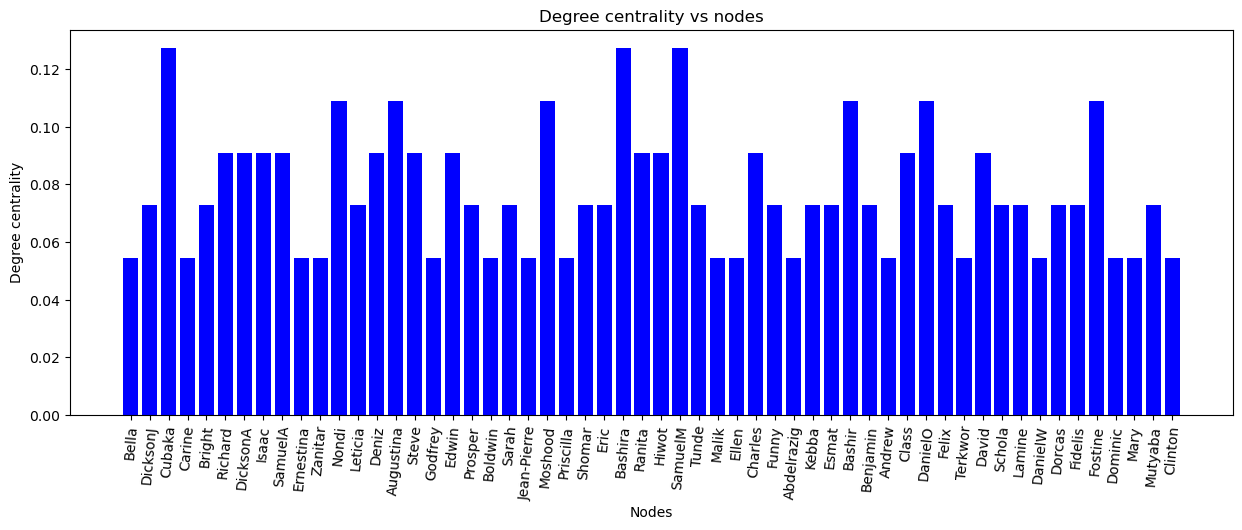

{'Bella': 0.05454545454545454,
 'DicksonJ': 0.07272727272727272,
 'Cubaka': 0.12727272727272726,
 'Carine': 0.05454545454545454,
 'Bright': 0.07272727272727272,
 'Richard': 0.09090909090909091,
 'DicksonA': 0.09090909090909091,
 'Isaac': 0.09090909090909091,
 'SamuelA': 0.09090909090909091,
 'Ernestina': 0.05454545454545454,
 'Zanitar': 0.05454545454545454,
 'Nondi': 0.10909090909090909,
 'Leticia': 0.07272727272727272,
 'Deniz': 0.09090909090909091,
 'Augustina': 0.10909090909090909,
 'Steve': 0.09090909090909091,
 'Godfrey': 0.05454545454545454,
 'Edwin': 0.09090909090909091,
 'Prosper': 0.07272727272727272,
 'Boldwin': 0.05454545454545454,
 'Sarah': 0.07272727272727272,
 'Jean-Pierre': 0.05454545454545454,
 'Moshood': 0.10909090909090909,
 'Priscilla': 0.05454545454545454,
 'Shomar': 0.07272727272727272,
 'Eric': 0.07272727272727272,
 'Bashira': 0.12727272727272726,
 'Ranita': 0.09090909090909091,
 'Hiwot': 0.09090909090909091,
 'SamuelM': 0.12727272727272726,
 'Tunde': 0.0727272727

In [10]:
# Compute degree centrality
degree_centrality = nx.degree_centrality(G)


# Find the node with the highest degree centrality
max_node = max(degree_centrality, key=degree_centrality.get)
max_value = degree_centrality[max_node]
print(f"Node with highest degree centrality: {max_node} ({max_value:.4f})")

# Extract centrality values for plotting
degree_values = list(degree_centrality.values())
nodes = list(degree_centrality.keys())

degree_centrality = nx.degree_centrality(G)
plt.figure(figsize=(15, 5))
plt.bar(degree_centrality.keys(), degree_centrality.values(), color="blue")
plt.title('Degree centrality vs nodes')
plt.xlabel("Nodes")
plt.ylabel("Degree centrality")
plt.xticks(rotation=85) 
plt.show()



degree_centrality


Node with highest eigenvector centrality: SamuelM (0.3873239436619718)


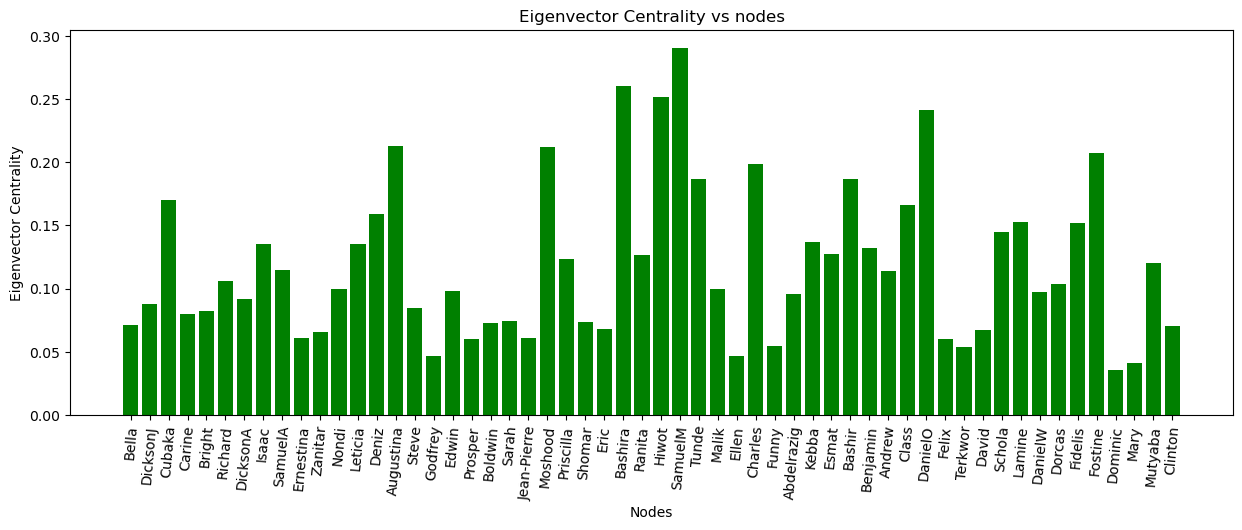

In [11]:
Eigen = nx.eigenvector_centrality(G)
max_node3 = max(Eigen, key=Eigen.get)
max_values3 = Close[max_node3]
print(f"Node with highest eigenvector centrality: {max_node3} ({max_values3})")

eigenvector_centrality = nx.eigenvector_centrality(G)
plt.figure(figsize=(15, 5))
plt.bar(eigenvector_centrality.keys(), eigenvector_centrality.values(), color="green")
plt.title('Eigenvector Centrality vs nodes')
plt.xlabel("Nodes")
plt.ylabel("Eigenvector Centrality")
plt.xticks(rotation=85) 
plt.show()



Node with highest Subgraph centrality: SamuelM (15.7114977963458)


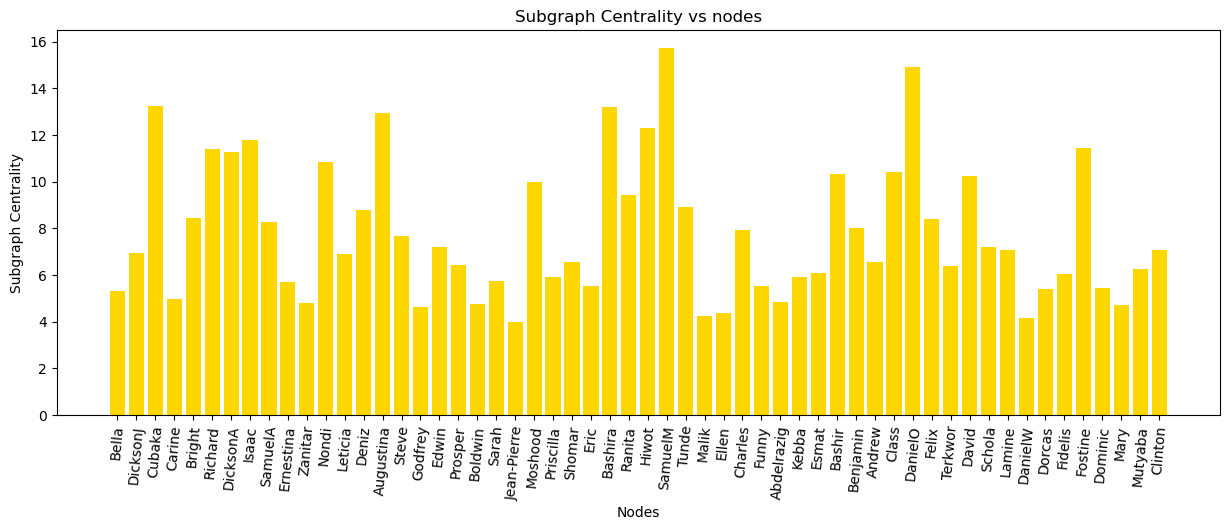

In [12]:

Subgraph= nx.subgraph_centrality(G)
max_node4 = max(Subgraph, key=Subgraph.get)
max_values4 = Subgraph[max_node4]
print(f"Node with highest Subgraph centrality: {max_node4} ({max_values4})")


subgraph_centrality = nx.subgraph_centrality(G)
plt.figure(figsize=(15, 5))
plt.bar(subgraph_centrality.keys(), subgraph_centrality.values(), color="gold")
plt.title('Subgraph Centrality vs nodes')
plt.xlabel("Nodes")
plt.ylabel("Subgraph Centrality")
plt.xticks(rotation=85) 
plt.show()

Node with highest Betweeness centrality: Bashira (0.17286525670364056)


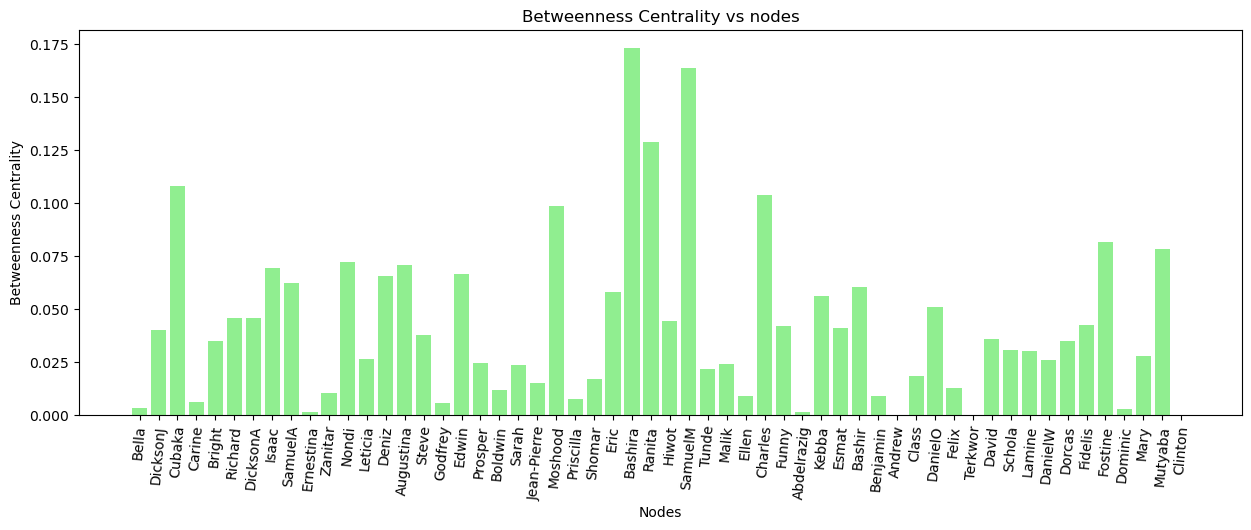

In [13]:
Bet = nx.betweenness_centrality(G)
max_node1 = max(Bet, key=Bet.get)  # Find node with highest degree centrality
max_value1 = Bet[max_node1]  # Get its value

print(f"Node with highest Betweeness centrality: {max_node1} ({max_value1})")

betweenness_centrality = nx.betweenness_centrality(G)
plt.figure(figsize=(15, 5))
plt.bar(betweenness_centrality.keys(), betweenness_centrality.values(), color="lightgreen")
plt.title('Betweenness Centrality vs nodes')
plt.xlabel("Nodes")
plt.ylabel("Betweenness Centrality")
plt.xticks(rotation=85) 
plt.show()




## Question 3 (Network density)

Degree Distribution

In [14]:
degrees =[G.degree(n) for n in G.nodes()]
degrees_counts = Counter(degrees)

N = G.number_of_nodes()
normalized_distribution = {degree: count / N for degree, count in degrees_counts.items()}
normalized_distribution


{3: 0.30357142857142855,
 4: 0.32142857142857145,
 7: 0.05357142857142857,
 5: 0.21428571428571427,
 6: 0.10714285714285714}

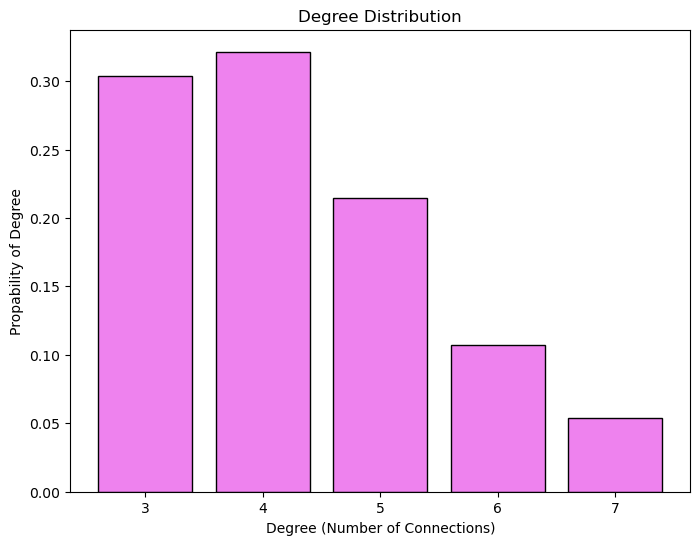

In [15]:
import matplotlib.pyplot as plt

# Extract keys (degrees) and values (normalized counts)
degrees = list(normalized_distribution.keys())
counts = list(normalized_distribution.values())

# Plot histogram
plt.figure(figsize=(8, 6))
plt.bar(degrees, counts, color="violet", edgecolor="black")

# Labels and title
plt.xlabel("Degree (Number of Connections)")
plt.ylabel("Propability of Degree")
plt.title("Degree Distribution")
plt.xticks(degrees)  # Ensure all degree values appear on x-axis

plt.show()


In [16]:
import networkx as nx
import community  # Louvain method for community detection

# Compute communities using Louvain
partition = community.best_partition(G)  

# Print community assignments
for node, comm in partition.items():
    print(f"Node {node} is in Community {comm}")

# Number of detected communities
num_communities = len(set(partition.values()))
print(f"Total Communities: {num_communities}")


Node Bella is in Community 0
Node DicksonJ is in Community 0
Node Cubaka is in Community 0
Node Carine is in Community 0
Node Bright is in Community 1
Node Richard is in Community 1
Node DicksonA is in Community 1
Node Isaac is in Community 1
Node SamuelA is in Community 2
Node Ernestina is in Community 2
Node Zanitar is in Community 2
Node Nondi is in Community 2
Node Leticia is in Community 3
Node Deniz is in Community 3
Node Augustina is in Community 3
Node Steve is in Community 4
Node Godfrey is in Community 4
Node Edwin is in Community 4
Node Prosper is in Community 4
Node Boldwin is in Community 0
Node Sarah is in Community 0
Node Jean-Pierre is in Community 5
Node Moshood is in Community 3
Node Priscilla is in Community 3
Node Shomar is in Community 2
Node Eric is in Community 4
Node Bashira is in Community 6
Node Ranita is in Community 7
Node Hiwot is in Community 6
Node SamuelM is in Community 6
Node Tunde is in Community 6
Node Malik is in Community 2
Node Ellen is in Communi

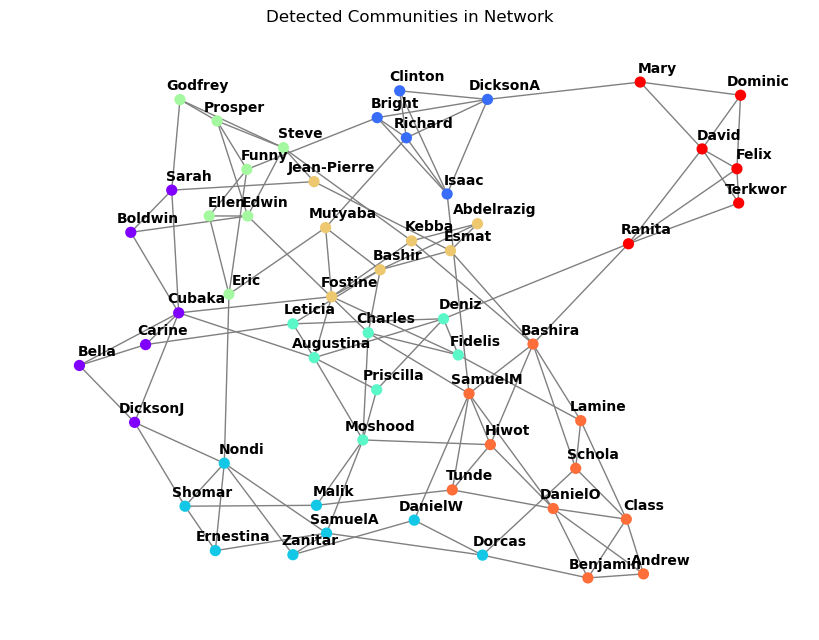

In [17]:
# Assign colors based on community
node_colors = list(partition.values())  # Convert dict values to a list

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)  # Stable layout

# Draw graph without labels
nx.draw(
    G, pos, with_labels=False, node_color=node_colors, 
    cmap=plt.cm.rainbow, node_size=50, edge_color="gray"
)

# Offset labels to appear beside nodes
label_offset = {node: (x + 0.05, y + 0.05) for node, (x, y) in pos.items()}
nx.draw_networkx_labels(G, label_offset, font_size=10, font_color="black", font_weight="bold")

plt.title("Detected Communities in Network")
plt.show()


In [18]:
from networkx.algorithms.community.quality import modularity

# Compute communities using Louvain method
partition = community.best_partition(G)  # Dictionary mapping nodes to communities

# Convert partition dictionary to a list of sets (required format for modularity calculation)
community_sets = {}
for node, comm in partition.items():
    community_sets.setdefault(comm, set()).add(node)

# Compute modularity score
mod_score = modularity(G, list(community_sets.values()))

print(f"Modularity Score: {mod_score:.4f}")
# Strong	There is a good community structure, but some overlap

Modularity Score: 0.5826


## Question 5 (Shortest path and distances)

In [19]:

# Compute shortest path distances between all pairs
distance_matrix = nx.floyd_warshall_numpy(G)

# Convert to NumPy array for better visualization
distance_matrix = np.array(distance_matrix)
print("Distance Matrix:\n", distance_matrix)


Distance Matrix:
 [[0. 1. 1. ... 6. 3. 5.]
 [1. 0. 1. ... 6. 3. 5.]
 [1. 1. 0. ... 5. 2. 4.]
 ...
 [6. 6. 5. ... 0. 3. 2.]
 [3. 3. 2. ... 3. 0. 2.]
 [5. 5. 4. ... 2. 2. 0.]]


In [20]:
import statistics

all_shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G))

# Extract all shortest path lengths (excluding self-loops where source == target)
path_lengths = [
    length for source, targets in all_shortest_path_lengths.items()
    for target, length in targets.items() if source != target
]

# Compute required statistics
average_path_length = sum(path_lengths) / len(path_lengths)  # Mean
max_path_length = max(path_lengths)  # Maximum
min_path_length = min(path_lengths)  # Minimum
modal_path_length = statistics.mode(path_lengths)  

# Print results
print(f"Average Path Length: {average_path_length:.2f}")
print(f"Max Path Length: {max_path_length}")
print(f"Min Path Length: {min_path_length}")
print(f"Modal Path Length: {modal_path_length}")


Average Path Length: 3.29
Max Path Length: 7
Min Path Length: 1
Modal Path Length: 4


## Question 6 (Clustering coefficient)

In [21]:
Coeff = sum(nx.clustering(G).values())/len(nx.clustering(G).keys())
print(Coeff)


0.32814625850340134


## Question 7 (Weak ties)

In [22]:
# Find all bridges in the network
list(nx.bridges(G))

[]

## Question 9 (Network robustness)

In [23]:
def remove_top_degree_nodes(G, num_nodes):
    """Remove the top `num_nodes` nodes with the highest degree"""
    G_copy = G.copy()
    degree_dict = dict(G.degree())
    top_nodes = sorted(degree_dict, key=degree_dict.get, reverse=True)[:num_nodes]
    
    G_copy.remove_nodes_from(top_nodes)
    
    return G_copy

# Remove the top 5 most connected nodes
G_removed = remove_top_degree_nodes(G, 5)

# Check if the graph is still connected
print("Is the network still connected?", nx.is_connected(G_removed))
print("Number of components after removal:", nx.number_connected_components(G_removed))


Is the network still connected? True
Number of components after removal: 1


## Question 10 (Graph plotting and interpretation)

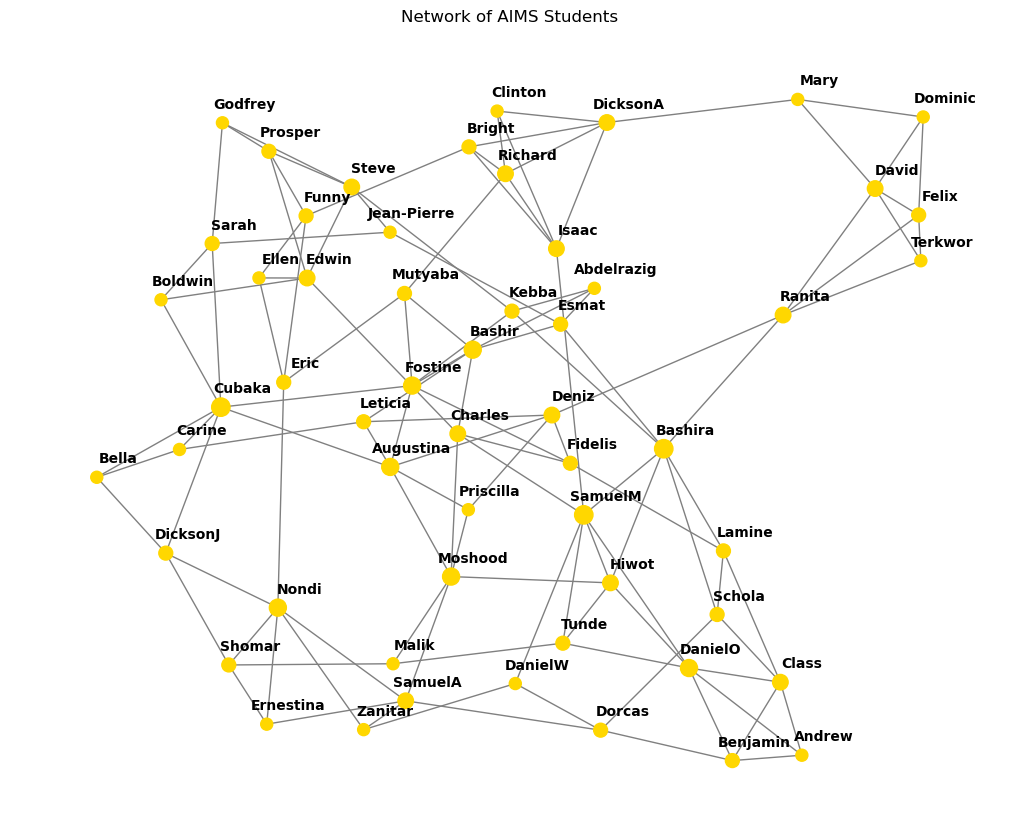

In [24]:
# Compute node sizes based on degree (more connections = bigger node)
node_sizes = [G.degree(n) * 25 for n in G.nodes]

# Generate graph layout
pos = nx.spring_layout(G, seed=42)

# Offset labels to appear beside nodes
label_offset = {node: (x + 0.05, y + 0.05) for node, (x, y) in pos.items()}

# Plot the graph
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=False, node_size=node_sizes, node_color='gold', edge_color="gray", font_size=8)

# Add labels beside nodes
nx.draw_networkx_labels(G, label_offset, font_size=10, font_color="black", font_weight="bold")

plt.title('Network of AIMS Students')
plt.show()

## Question 11

(Degree distribution tell us about social interactions)\
The degree distribution follows a power-law (scale-free network), this show that there is the presences of hubs, this means that some few students may have many connecctions while most have a few.


## Question 12

In [25]:
sorted_keys = [k for k, v in sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)][:5]
print(sorted_keys)  



['Cubaka', 'Bashira', 'SamuelM', 'Nondi', 'Augustina']


## Question 13

What role do isolated students play, and should they be integrated more?

In [26]:
isolated_students = list(nx.isolates(G))
print("Isolated Students:", isolated_students)
#There are no isolated students.

Isolated Students: []


## Question 14 

Can we predict friendships based on common connections? yes

In [27]:
import networkx as nx

# Generate potential friendships using common neighbors
predictions = []
for u, v in nx.non_edges(G):  # Pairs that are not yet friends
    common_neighbors = len(list(nx.common_neighbors(G, u, v)))
    if common_neighbors > 1:  
        predictions.append((u, v, common_neighbors))

# Sort potential friendships by number of mutual friends
predictions.sort(key=lambda x: x[2], reverse=True)

# Display top 10 predicted friendships
print("Top 10 Predicted Friendships (based on common neighbors):")
for u, v, score in predictions[:168]:
    print(f"{u} - {v} (Mutual Friends: {score})")


Top 10 Predicted Friendships (based on common neighbors):
Bright - Clinton (Mutual Friends: 3)
Shomar - SamuelA (Mutual Friends: 2)
DicksonJ - Ernestina (Mutual Friends: 2)
DicksonJ - Carine (Mutual Friends: 2)
Sarah - Steve (Mutual Friends: 2)
Leticia - Priscilla (Mutual Friends: 2)
Leticia - Cubaka (Mutual Friends: 2)
Leticia - Fostine (Mutual Friends: 2)
Hiwot - Malik (Mutual Friends: 2)
Hiwot - Charles (Mutual Friends: 2)
Dominic - Ranita (Mutual Friends: 2)
Dominic - Terkwor (Mutual Friends: 2)
Augustina - Carine (Mutual Friends: 2)
Augustina - Bashir (Mutual Friends: 2)
Augustina - Fidelis (Mutual Friends: 2)
Bashira - Abdelrazig (Mutual Friends: 2)
Bashira - DanielO (Mutual Friends: 2)
Bashira - Tunde (Mutual Friends: 2)
Bashira - Class (Mutual Friends: 2)
Ernestina - Zanitar (Mutual Friends: 2)
Ellen - Prosper (Mutual Friends: 2)
Abdelrazig - Fostine (Mutual Friends: 2)
Godfrey - Jean-Pierre (Mutual Friends: 2)
Godfrey - Edwin (Mutual Friends: 2)
Benjamin - Schola (Mutual Frien